<a href="https://colab.research.google.com/github/PalakAggarwal13/PyTorch-DeepLearning/blob/main/PyTorch_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
print(torch.__version__)

2.6.0+cu124


In [5]:
t1 = torch.tensor(4.)
t1

tensor(4.)

In [6]:
t1.dtype

torch.float32

In [7]:
t2 = torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

In [8]:
t2.dtype

torch.float32

In [9]:
t3 = torch.tensor([[1.,2,3],[4,5,6],[7,8,9]])
t3

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [10]:
t3.dtype

torch.float32

In [11]:
t4 = torch.tensor([
    [[11.,12,13],
     [14,15,16]],
    [[17,18,19],
     [20,21,22]]
])
t4

tensor([[[11., 12., 13.],
         [14., 15., 16.]],

        [[17., 18., 19.],
         [20., 21., 22.]]])

In [12]:
t4.dtype

torch.float32

In [13]:
t1.shape

torch.Size([])

In [14]:
t2.shape

torch.Size([4])

In [15]:
t3.shape

torch.Size([3, 3])

In [16]:
t4.shape

torch.Size([2, 2, 3])

In [17]:
x = torch.tensor(3.)
w = torch.tensor(4. , requires_grad = True)
b = torch.tensor(5. , requires_grad = True)

In [18]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [19]:
y.backward()

In [20]:
print("dy/dx:" , x.grad)
print("dy/dw:" , w.grad)
print("dy/db:" , b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [21]:
import numpy as np

x = np.array([[1.,2,3],[4,5,6]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [22]:
y = torch.from_numpy(x)            #or you can do torch.tensor(x)
y

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

In [23]:
x.dtype , y.dtype

(dtype('float64'), torch.float64)

In [24]:
z = y.numpy()
z

array([[1., 2., 3.],
       [4., 5., 6.]])

In [25]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [26]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [27]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [28]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[-0.5925, -0.1873, -1.3526],
        [ 1.7601,  0.4885,  1.5674]], requires_grad=True)
tensor([1.0337, 1.4639], requires_grad=True)


In [29]:
def model(x):
  return x @ w.t() + b

In [30]:
preds = model(inputs)
preds

tensor([[-112.9318,  230.0782],
        [-155.9350,  304.9336],
        [-154.0671,  310.9583],
        [-117.5033,  259.9939],
        [-152.5137,  279.5232]], grad_fn=<AddBackward0>)

In [31]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [32]:
def mse(t1,t2):
  diff = t1-t2
  return torch.sum(diff * diff) / diff.numel()

In [33]:
loss = mse(preds , targets)
print(loss)  # full tensor

tensor(41836.7383, grad_fn=<DivBackward0>)


In [34]:
loss.backward()

In [35]:
print("dl/dw : " , w.grad)
print("dl/db : " , b.grad)

dl/dw :  tensor([[-17901.9492, -19857.5352, -12262.6787],
        [ 15909.5039,  15503.3545,   9948.8184]])
dl/db :  tensor([-214.7902,  185.0974])


In [36]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# **GRADIENT DESCENT**

In [37]:
import torch

inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)

lr = 1e-5

def mse(preds,targets):
  return torch.mean((preds-targets)**2)

for epoch in range(100):

  preds = inputs @ w.t() + b
  loss  = mse(preds,targets)

  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

  if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f} ,  w =\n{w} , b = {b}")

Epoch 0: Loss = 27353.6973 ,  w =
tensor([[0.8178, 1.4089, 0.6390],
        [0.1647, 1.8569, 0.6546]], requires_grad=True) , b = tensor([ 1.5908, -0.8908], requires_grad=True)
Epoch 10: Loss = 680.6536 ,  w =
tensor([[ 0.1907,  0.7854,  0.2482],
        [-0.2957,  1.3320,  0.3448]], requires_grad=True) , b = tensor([ 1.5835, -0.8962], requires_grad=True)
Epoch 20: Loss = 150.8702 ,  w =
tensor([[ 0.0818,  0.7154,  0.1996],
        [-0.3487,  1.2465,  0.3056]], requires_grad=True) , b = tensor([ 1.5824, -0.8969], requires_grad=True)
Epoch 30: Loss = 127.6875 ,  w =
tensor([[ 0.0463,  0.7213,  0.1984],
        [-0.3459,  1.2227,  0.3041]], requires_grad=True) , b = tensor([ 1.5821, -0.8969], requires_grad=True)
Epoch 40: Loss = 115.7712 ,  w =
tensor([[ 0.0221,  0.7366,  0.2037],
        [-0.3361,  1.2081,  0.3079]], requires_grad=True) , b = tensor([ 1.5819, -0.8968], requires_grad=True)
Epoch 50: Loss = 105.3788 ,  w =
tensor([[ 6.4558e-04,  7.5235e-01,  2.0972e-01],
        [-3.2585e-

# **Linear regression using PyTorch built-ins**

In [38]:
import torch.nn as nn

In [39]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58],
                   [102, 43, 37], [69, 96, 70], [73, 67, 43],
                   [91, 88, 64], [87, 134, 58], [102, 43, 37],
                   [69, 96, 70], [73, 67, 43], [91, 88, 64],
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]],
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133],
                    [22, 37], [103, 119], [56, 70],
                    [81, 101], [119, 133], [22, 37],
                    [103, 119], [56, 70], [81, 101],
                    [119, 133], [22, 37], [103, 119]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [40]:
from torch.utils.data import TensorDataset

In [41]:
train_ds = TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [42]:
from torch.utils.data import DataLoader

In [43]:
batch_size=5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [44]:
i=0
for xb,yb in train_dl:
  print(f"batch:{i} ")
  print(xb)
  print(yb)
  i +=1

batch:0 
tensor([[ 87., 134.,  58.],
        [ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.]])
tensor([[119., 133.],
        [103., 119.],
        [119., 133.],
        [ 56.,  70.],
        [ 22.,  37.]])
batch:1 
tensor([[102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 22.,  37.],
        [103., 119.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
batch:2 
tensor([[91., 88., 64.],
        [91., 88., 64.],
        [73., 67., 43.],
        [91., 88., 64.],
        [73., 67., 43.]])
tensor([[ 81., 101.],
        [ 81., 101.],
        [ 56.,  70.],
        [ 81., 101.],
        [ 56.,  70.]])


In [45]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0656, -0.2626, -0.5385],
        [ 0.1565, -0.2007, -0.2703]], requires_grad=True)
Parameter containing:
tensor([ 0.3980, -0.0874], requires_grad=True)


In [46]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0656, -0.2626, -0.5385],
         [ 0.1565, -0.2007, -0.2703]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3980, -0.0874], requires_grad=True)]

In [47]:
import torch.nn.functional as F

In [48]:
loss_fn = F.mse_loss

In [49]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(17098.7383, grad_fn=<MseLossBackward0>)


In [50]:
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

In [51]:
def fit(num_epochs,model,loss_fn,opt):
  for epoch in range(num_epochs):
    for xb,yb in train_dl:
      preds = model(xb)
      loss = loss_fn(preds,yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [52]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 62.2933
Epoch [20/100], Loss: 302.5911
Epoch [30/100], Loss: 378.0081
Epoch [40/100], Loss: 282.3161
Epoch [50/100], Loss: 151.8393
Epoch [60/100], Loss: 70.9688
Epoch [70/100], Loss: 7.9849
Epoch [80/100], Loss: 72.6606
Epoch [90/100], Loss: 61.0451
Epoch [100/100], Loss: 51.4158


In [53]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.9617,  72.0724],
        [ 79.0829,  97.4798],
        [122.9846, 137.5545],
        [ 30.6380,  46.7665],
        [ 90.9826, 107.8677],
        [ 58.9617,  72.0724],
        [ 79.0829,  97.4798],
        [122.9846, 137.5545],
        [ 30.6380,  46.7665],
        [ 90.9826, 107.8677],
        [ 58.9617,  72.0724],
        [ 79.0829,  97.4798],
        [122.9846, 137.5545],
        [ 30.6380,  46.7665],
        [ 90.9826, 107.8677]], grad_fn=<AddmmBackward0>)

In [54]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# **Working with Images & Logistic Regression in PyTorch**

In [55]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [56]:
dataset = MNIST(root='data/',download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 82.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 25.9MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 44.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.56MB/s]


In [57]:
len(dataset)

60000

In [58]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [59]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


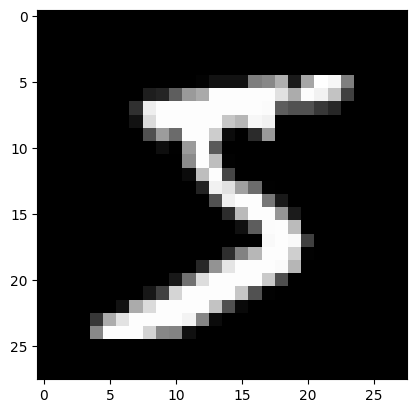

In [61]:
image , label = dataset[0]
plt.imshow(image , cmap='gray')
print("Label:" ,label)

Label: 3


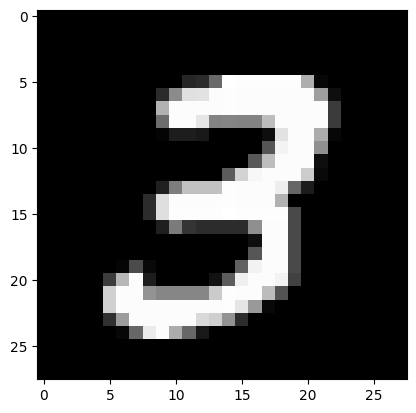

In [62]:
image , label = dataset[7]
plt.imshow(image , cmap='gray')
print("Label:" , label)

In [63]:
import torchvision.transforms as transforms

In [64]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [65]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [66]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


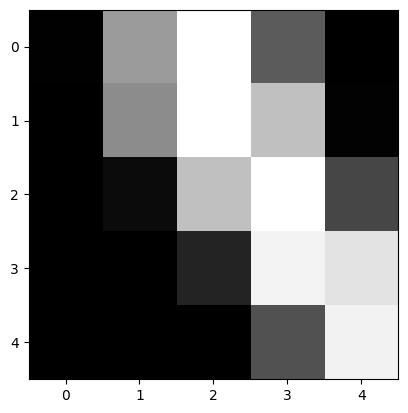

In [67]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

In [68]:
from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset,[50000,10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [69]:
from torch.utils.data import DataLoader

batch_size=128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [70]:
import numpy as np

def split_indices(n,val_pct):
  n_val = int(val_pct*n)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [71]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)

In [72]:
print(len(train_indices)) , print(len(val_indices))
print("sample val_indices : ", val_indices[:20])

48000
12000
sample val_indices :  [49189 59839 41110 36597 17173  7805 43542 14565 18139 28509 13207  5013
 36960 26160 53273 38348 15804 22883 54372 51337]


In [73]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [74]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler = val_indices)

In [75]:
print("xb.shape before flattening:", xb.shape)

xb.shape before flattening: torch.Size([5, 3])


In [76]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size,num_classes)

In [77]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0253, -0.0249, -0.0335,  ...,  0.0282, -0.0351,  0.0163],
        [-0.0169, -0.0315, -0.0239,  ...,  0.0161,  0.0235,  0.0193],
        [-0.0232, -0.0106,  0.0030,  ...,  0.0159, -0.0026, -0.0104],
        ...,
        [ 0.0097,  0.0144,  0.0126,  ..., -0.0160,  0.0061, -0.0183],
        [ 0.0071,  0.0247,  0.0024,  ..., -0.0096,  0.0081,  0.0020],
        [ 0.0144, -0.0162,  0.0225,  ..., -0.0092,  0.0306,  0.0106]],
       requires_grad=True)


In [78]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0057, -0.0295,  0.0225, -0.0249,  0.0262,  0.0236, -0.0248,  0.0108,
        -0.0152, -0.0233], requires_grad=True)


In [79]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, xb):
        xb = xb.view(xb.size(0), -1)
        return self.linear(xb)

model = MnistModel()

In [80]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784])
torch.Size([10])


[Parameter containing:
 tensor([[ 0.0254, -0.0120,  0.0277,  ..., -0.0144,  0.0239,  0.0223],
         [-0.0158, -0.0201,  0.0034,  ...,  0.0249, -0.0251,  0.0339],
         [ 0.0071, -0.0246,  0.0305,  ..., -0.0197, -0.0230, -0.0169],
         ...,
         [ 0.0259, -0.0246, -0.0277,  ...,  0.0168, -0.0270,  0.0185],
         [ 0.0289,  0.0234, -0.0282,  ...,  0.0128,  0.0189,  0.0247],
         [ 0.0188,  0.0094,  0.0062,  ...,  0.0030, -0.0148, -0.0046]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0147, -0.0323, -0.0223, -0.0167, -0.0241, -0.0328,  0.0048, -0.0040,
         -0.0351, -0.0270], requires_grad=True)]

In [81]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.0349,  0.1668, -0.0533,  0.0093, -0.1147,  0.1263,  0.0691,  0.1666,
          0.1054, -0.1299],
        [-0.0936,  0.0418,  0.0245,  0.2001,  0.2495, -0.0309, -0.0081,  0.0411,
         -0.1024, -0.3766]])


In [82]:
probs = F.softmax(outputs,dim=1)
print(probs[:2].data)
print("Sum : " , torch.sum(probs[0]).item())

tensor([[0.0931, 0.1139, 0.0914, 0.0973, 0.0860, 0.1094, 0.1033, 0.1139, 0.1071,
         0.0847],
        [0.0904, 0.1035, 0.1017, 0.1212, 0.1274, 0.0962, 0.0985, 0.1034, 0.0896,
         0.0681]])
Sum :  1.0


In [83]:
max_probs , preds = torch.max(probs , dim=1)
print(preds)
print(max_probs)

tensor([1, 4, 1, 4, 3, 2, 8, 3, 7, 1, 8, 3, 1, 1, 1, 8, 3, 8, 5, 4, 4, 4, 1, 7,
        1, 3, 4, 7, 7, 1, 5, 1, 5, 3, 4, 7, 7, 0, 5, 4, 4, 8, 7, 3, 7, 0, 7, 2,
        1, 5, 4, 5, 5, 3, 8, 3, 3, 1, 3, 7, 4, 7, 3, 3, 1, 5, 4, 3, 5, 1, 4, 0,
        5, 9, 8, 1, 5, 3, 7, 7, 4, 5, 1, 8, 1, 1, 8, 4, 4, 8, 1, 1, 7, 4, 3, 8,
        1, 4, 7, 1])
tensor([0.1139, 0.1274, 0.1297, 0.1190, 0.1582, 0.1235, 0.1371, 0.1433, 0.1531,
        0.1286, 0.1211, 0.1378, 0.1294, 0.1201, 0.1125, 0.1268, 0.1470, 0.1172,
        0.1172, 0.1216, 0.1191, 0.1176, 0.1174, 0.1125, 0.1269, 0.1294, 0.1122,
        0.1285, 0.1200, 0.1474, 0.1430, 0.1350, 0.1419, 0.1307, 0.1335, 0.1525,
        0.1318, 0.1070, 0.1147, 0.1260, 0.1182, 0.1262, 0.1404, 0.1276, 0.1318,
        0.1117, 0.1239, 0.1260, 0.1319, 0.1268, 0.1255, 0.1129, 0.1237, 0.1241,
        0.1227, 0.1272, 0.1198, 0.1553, 0.1339, 0.1213, 0.1319, 0.1237, 0.1495,
        0.1274, 0.1147, 0.1241, 0.1490, 0.1539, 0.1122, 0.1120, 0.1364, 0.1112,
        0.1141, 0.1

In [84]:
labels

tensor([4, 8, 9, 9, 5, 6, 6, 4, 3, 0, 1, 7, 2, 7, 1, 1, 5, 1, 2, 8, 0, 6, 8, 5,
        6, 9, 4, 3, 3, 9, 2, 7, 2, 4, 4, 8, 3, 1, 4, 4, 2, 3, 2, 9, 3, 9, 8, 9,
        7, 4, 0, 4, 4, 4, 2, 3, 8, 8, 7, 3, 0, 3, 9, 9, 1, 6, 0, 3, 8, 1, 0, 1,
        7, 1, 5, 7, 7, 3, 5, 3, 0, 4, 4, 6, 8, 4, 2, 2, 0, 6, 0, 7, 2, 4, 2, 4,
        7, 2, 8, 7])

In [85]:
def accuracy(outputs , labels):
  max_probs , preds = torch.max(probs,dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [86]:
accuracy(preds,labels)

tensor(0.1000)

In [87]:
loss_fn = F.cross_entropy

loss = loss_fn(outputs,preds)
print(loss)

tensor(2.0585, grad_fn=<NllLossBackward0>)


In [88]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr)

In [89]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric = None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds,yb)

  return loss.item(),len(xb),metric_results

In [90]:
def evaluate(model , loss_fn , valid_dl , metric = None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric = metric)for xb, yb in valid_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(nums,metrics)) / total
    return avg_loss , total , avg_metric

In [91]:
def accuracy(outputs , labels):
  _,preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item() / len(preds))

In [92]:
val_loss , total , val_accuracy = evaluate(model , loss_fn , val_loader , metric = accuracy)
print('Loss:{:.4f},Accuracy:{:.4f}'.format(val_loss,val_accuracy))

Loss:2.3318,Accuracy:0.0857


In [93]:
def fit(epochs , model , loss_fn , opt , train_dl , val_dl , metric=None):
  for epoch in range(epochs):
    for xb , yb in train_dl:
      loss = loss_batch(model,loss_fn,xb,yb,opt)
      result = evaluate(model , loss_fn , val_dl , metric)
      val_loss , total , val_metrics = result

      if metric is None:
        print('Epoch [{}/{}] , loss = {:.4f}'.format(epoch+1 , epochs , val_loss))
      else:
        print('Epoch [{}/{}] , loss = {:.4f} , {} : {:.4f}'.format(epoch+1 , epochs , val_loss , metric.__name__,val_metrics))

In [94]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters() , lr=0.001)

In [95]:
# fit(5 , model , F.cross_entropy ,optimizer,train_loader,val_loader,accuracy)

In [96]:
test_dataset= MNIST(root='data/',train=False,transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


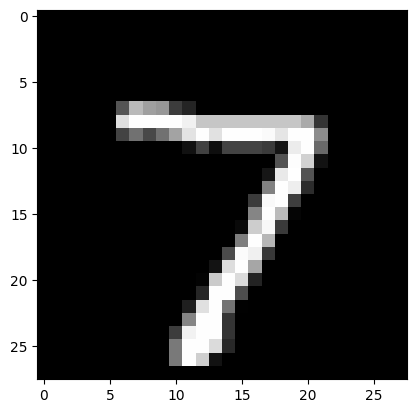

In [97]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [98]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 1


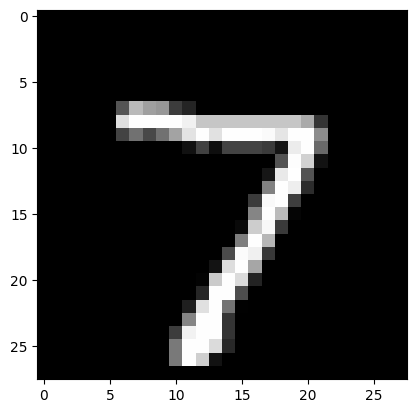

In [99]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 3


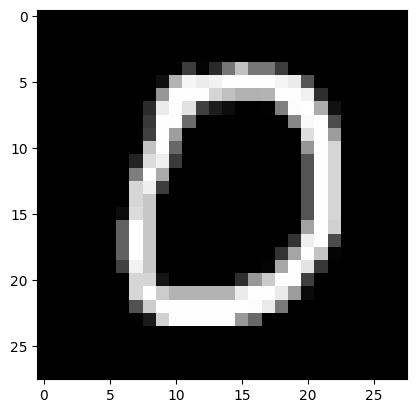

In [100]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 0


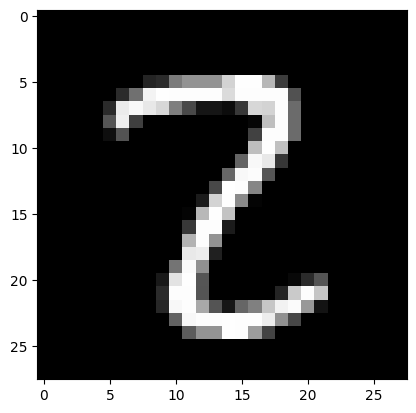

In [101]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [102]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model,F.cross_entropy, test_loader,metric=accuracy)
result

(np.float64(2.3662211082458495), np.int64(10000), np.float64(0.1022))

In [103]:
torch.save(model.state_dict(), 'mnist-logistic.pth')
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0255,  0.0258, -0.0178,  ...,  0.0271, -0.0093, -0.0274],
                      [-0.0052, -0.0005, -0.0117,  ..., -0.0186, -0.0020,  0.0282],
                      [ 0.0054,  0.0071,  0.0319,  ...,  0.0176, -0.0100,  0.0169],
                      ...,
                      [ 0.0035,  0.0146, -0.0013,  ...,  0.0157,  0.0004, -0.0331],
                      [-0.0156, -0.0175,  0.0052,  ...,  0.0183, -0.0258,  0.0213],
                      [-0.0274, -0.0030, -0.0186,  ...,  0.0017, -0.0325,  0.0141]])),
             ('linear.bias',
              tensor([ 0.0208, -0.0174,  0.0259,  0.0107, -0.0276, -0.0175,  0.0215,  0.0156,
                      -0.0346,  0.0330]))])

In [104]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0255,  0.0258, -0.0178,  ...,  0.0271, -0.0093, -0.0274],
                      [-0.0052, -0.0005, -0.0117,  ..., -0.0186, -0.0020,  0.0282],
                      [ 0.0054,  0.0071,  0.0319,  ...,  0.0176, -0.0100,  0.0169],
                      ...,
                      [ 0.0035,  0.0146, -0.0013,  ...,  0.0157,  0.0004, -0.0331],
                      [-0.0156, -0.0175,  0.0052,  ...,  0.0183, -0.0258,  0.0213],
                      [-0.0274, -0.0030, -0.0186,  ...,  0.0017, -0.0325,  0.0141]])),
             ('linear.bias',
              tensor([ 0.0208, -0.0174,  0.0259,  0.0107, -0.0276, -0.0175,  0.0215,  0.0156,
                      -0.0346,  0.0330]))])

In [105]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, F.cross_entropy,test_loader, metric=accuracy)
result

(np.float64(2.3662211082458495), np.int64(10000), np.float64(0.1022))

# **TRAINING DEEP NEURAL NETWORK USING GPU**

In [106]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [107]:
dataset = MNIST(root='data/' , download=True,transform = transforms.ToTensor())

In [108]:
len(dataset)

60000

torch.Size([1, 28, 28])
5


(None, None)

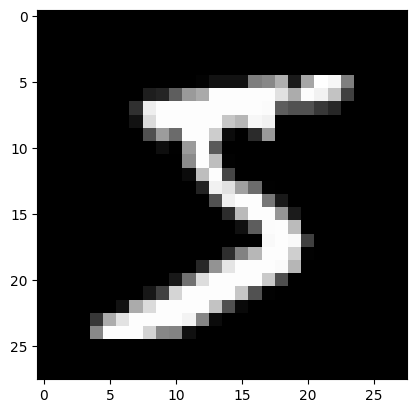

In [109]:
img , label = dataset[0]
plt.imshow(img[0] , cmap='gray')
print(img.shape) , print(label)

In [110]:
def split_indices(n,val_pct):
  n_val = int(n*val_pct)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [111]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)
print(len(train_indices)) , print(len(val_indices))

48000
12000


(None, None)

In [112]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset , batch_size=batch_size , sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset , batch_size=batch_size , sampler = val_sampler)

In [113]:
for images, labels in train_loader:
    print(images.shape)  # torch.Size([100, 1, 28, 28])
    images_flat = images.view(images.size(0), -1)
    print(images_flat.shape)  # torch.Size([100, 784])
    break

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])


In [114]:
import torch.nn as nn
import torch.nn.functional as F

In [115]:
class MnistModel(nn.Module):
    def __init__(self,in_size,hidden_size,out_size):
      super().__init__()
      self.linear1 = nn.Linear(in_size,hidden_size)
      self.linear2 = nn.Linear(hidden_size,out_size)

    def forward(self,xb):
      xb = xb.view(xb.size(0),-1)
      out = self.linear1(xb)
      out = F.relu(out)
      out = self.linear2(out)
      return out

In [116]:
input_size = 28*28
num_classes = 10

model = MnistModel(in_size=input_size,hidden_size=32,out_size=10)

In [117]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [118]:
for images , labels in train_loader:
  outputs = model(images)
  loss = F.cross_entropy(outputs,labels)
  print('Loss:',loss.item())
  break

print(outputs.shape)
print(outputs[:2])

Loss: 2.3133609294891357
torch.Size([100, 10])
tensor([[ 0.1698,  0.1517,  0.1436, -0.1386,  0.1130,  0.1354, -0.1830, -0.0106,
         -0.1382,  0.0417],
        [ 0.2399,  0.2188,  0.1589, -0.1725,  0.1320,  0.1117, -0.2452,  0.0012,
          0.0381,  0.1607]], grad_fn=<SliceBackward0>)


In [119]:
torch.cuda.is_available()

False

In [120]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [121]:
device = get_default_device()
device

device(type='cpu')

In [122]:
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

In [123]:
for images , labels in train_loader:
  print(images.shape)
  images = to_device(images,device)
  print(images.device)
  break

torch.Size([100, 1, 28, 28])
cpu


In [124]:
class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)

In [125]:
train_dl = DeviceDataLoader(train_loader,device)
val_dl = DeviceDataLoader(val_loader,device)

In [126]:
for xb , yb in train_dl:
  print(xb.device)
  print(yb)
  break

cpu
tensor([9, 5, 3, 5, 8, 0, 0, 8, 3, 3, 5, 9, 4, 3, 3, 7, 8, 5, 2, 7, 5, 4, 1, 3,
        6, 4, 4, 5, 3, 4, 8, 0, 1, 2, 2, 3, 3, 9, 1, 7, 3, 4, 9, 0, 2, 0, 6, 1,
        4, 9, 7, 1, 4, 5, 4, 3, 9, 1, 3, 0, 7, 1, 2, 0, 5, 6, 5, 6, 8, 0, 9, 6,
        0, 7, 0, 7, 3, 1, 7, 3, 1, 7, 5, 9, 0, 5, 0, 8, 2, 0, 6, 3, 9, 2, 1, 1,
        5, 3, 9, 7])


In [127]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric=None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds,yb)

  return loss.item() , len(xb) , metric_results

In [128]:
def evaluate(model , loss_fn , val_dl , metric=None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric = metric) for xb , yb in val_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(nums,metrics)) / total
    return avg_loss , total , avg_metric

In [129]:
def fit(epochs , lr , model , loss_fn , train_dl , val_dl , opt = None , metric=None):
  losses , metrics = [] , []
  if opt is None:
    opt = torch.optim.SGD(model.parameters() , lr=lr)

  for epoch in range(epochs):
    for xb , yb in train_dl:
      loss,_,_ = loss_batch(model , loss_fn , xb , yb , opt)

    result = evaluate(model , loss_fn , val_dl , metric)
    val_loss , total , val_metrics = result
    losses.append(loss)
    metrics.append(val_metrics)

    if metric is None:
      print('Epoch [{}/{}] , loss = {:.4f}'.format(epoch+1 , epochs , val_loss))
    else:
      print('Epoch [{}/{}] , loss = {:.4f} , {} : {:.4f}'.format(epoch+1 , epochs , val_loss , metric.__name__,val_metrics))

  return losses , metrics

In [130]:
def accuracy(outputs , labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [131]:
model = MnistModel(input_size , hidden_size = 32 , out_size = num_classes)
to_device(model , device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [132]:
val_loss , total , val_accuracy = evaluate(model , F.cross_entropy , val_dl , metric = accuracy)
print('Loss: {:.4f} , Accuracy : {:.4f}'.format(val_loss , val_accuracy))

Loss: 2.3054 , Accuracy : 0.0982


In [133]:
losses1 , metrics1 = fit(5 , 0.5 , model , F.cross_entropy , train_dl , val_dl , metric = accuracy )

Epoch [1/5] , loss = 0.2082 , accuracy : 0.9373
Epoch [2/5] , loss = 0.1852 , accuracy : 0.9435
Epoch [3/5] , loss = 0.1515 , accuracy : 0.9565
Epoch [4/5] , loss = 0.1312 , accuracy : 0.9618
Epoch [5/5] , loss = 0.1475 , accuracy : 0.9570


In [134]:
losses2 , metrics2 = fit(10 , 0.1 , model , F.cross_entropy , train_dl , val_dl , metric = accuracy )

Epoch [1/10] , loss = 0.1170 , accuracy : 0.9654
Epoch [2/10] , loss = 0.1169 , accuracy : 0.9659
Epoch [3/10] , loss = 0.1143 , accuracy : 0.9666
Epoch [4/10] , loss = 0.1168 , accuracy : 0.9667
Epoch [5/10] , loss = 0.1128 , accuracy : 0.9668
Epoch [6/10] , loss = 0.1148 , accuracy : 0.9677
Epoch [7/10] , loss = 0.1139 , accuracy : 0.9676
Epoch [8/10] , loss = 0.1141 , accuracy : 0.9677
Epoch [9/10] , loss = 0.1133 , accuracy : 0.9663
Epoch [10/10] , loss = 0.1143 , accuracy : 0.9675


Text(0.5, 1.0, 'Accuracy vs No. of epochs')

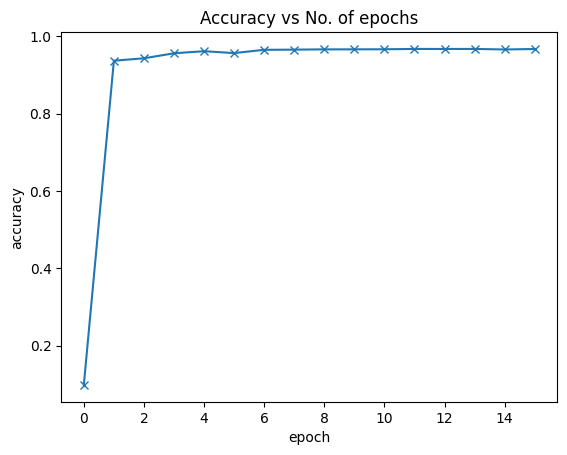

In [135]:
accuracies = [val_accuracy] + metrics1 + metrics2
plt.plot(accuracies , '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')

# **IMAGE CLASSIFICATION USING CONVOLUTION NEURAL NETWORKS (CNNs)**

In [136]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

In [137]:
# dataset_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
# download_url(dataset_url, '.')
# with tarfile.open('./cifar-10-python.tar.gz' , 'r:gz') as tar:
#   tar.extractall(path='./data')

In [138]:
# data_dir = './data/cifar-10-batches-py'

# print(os.listdir(data_dir))
# classes = os.listdir(data_dir + "/train")
# print(classes)

In [139]:
simple_model = nn.Sequential(
    nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [140]:
for images , labels in train_dl:
  print('images.shape: ',images.shape)
  out = simple_model(images)
  print('out.shape:',out.shape)
  break

images.shape:  torch.Size([100, 1, 28, 28])
out.shape: torch.Size([100, 8, 14, 14])


In [141]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1), # → (16, 28, 28)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (16, 14, 14)

    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),# → (32, 14, 14)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (32, 7, 7)

    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
)

In [142]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1), # → (16, 28, 28)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (16, 14, 14)

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),# → (32, 14, 14)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (32, 7, 7)

    nn.Flatten(),
    nn.Linear(16 * 7 * 7, 10),
)

In [143]:
for images , labels in train_dl:
  print('images.shape: ',images.shape)
  out = model(images)
  print('out.shape:',out.shape)
  print('out[0]:',out[0])
  break

images.shape:  torch.Size([100, 1, 28, 28])
out.shape: torch.Size([100, 10])
out[0]: tensor([ 0.0764,  0.0265, -0.1117,  0.0659,  0.0447, -0.0858, -0.0038, -0.0136,
        -0.0205, -0.0821], grad_fn=<SelectBackward0>)


In [144]:
probs = F.softmax(out[0], dim=0)

torch.sum(probs) , probs
torch.max(probs)

tensor(0.1089, grad_fn=<MaxBackward1>)

In [145]:
def get_default_device():
  if torch.cuda.is_available():
    print('GPU')
  else:
    print('CPU')

def to_device(data , device):
  if isinstance(data , (list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device , non_blocking=True)

class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)

In [146]:
device = get_default_device()
device

CPU


In [147]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(val_dl , device)
to_device(model , device)

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=10, bias=True)
)

In [148]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric=None):
  preds = model(xb)
  loss = loss_fn(preds , yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds , yb)

  return loss.item() , len(xb) , metric_results

In [149]:
def evaluate(model , loss_fn , valid_dl , metric = None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric=metric)
                for xb , yb in valid_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total

    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics,nums))/total
    return avg_loss , total , avg_metric

In [150]:
def fit(epochs ,model , loss_fn ,lr, train_dl , valid_dl , opt=None , metric=None):
  train_losses , valid_losses , valid_metrics = [] , [] , []
  if opt is None:
    opt = torch.optim.SGD(model.parameters(),lr=lr)
  for epoch in range(epochs):
    for xb,yb in train_dl:
      train_loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
    val_loss , total , val_metric = evaluate(model,loss_fn,valid_dl,metric)

    train_losses.append(train_loss)
    valid_losses.append(val_loss)
    valid_metrics.append(val_metric)

    if metric is None:
      print('Epoch [{}/{}] , train_loss : {:4f} , val_loss:{:4f}'.format(epoch+1,epochs,train_loss,val_loss))
    else:
      print('Epoch [{}/{}] , train_loss : {:4f} , val_loss:{:4f} , val_{} : {:4f}'.format(epoch+1,epochs,train_loss,val_loss,metric.__name__,val_metric))

  return train_losses , valid_losses , valid_metrics


In [151]:
def accuracy(outputs,labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds==labels).item() / len(preds)

In [152]:
val_loss , _ , val_acc = evaluate(model,F.cross_entropy,valid_dl,metric=accuracy)
print('Loss: {:.4f} , Accuracy : {:.4f}'.format(val_loss,val_acc))

Loss: 2.2977 , Accuracy : 0.0654


In [153]:
epochs = 10
opt = torch.optim.Adam(model.parameters(),lr=lr)
lr = 0.005

history = fit(epochs , model , F.cross_entropy,lr ,train_dl,valid_dl ,opt, accuracy)
train_losses , val_losses , val_metrics = history

Epoch [1/10] , train_loss : 0.267524 , val_loss:0.150321 , val_accuracy : 0.956333
Epoch [2/10] , train_loss : 0.035938 , val_loss:0.098990 , val_accuracy : 0.969583
Epoch [3/10] , train_loss : 0.052416 , val_loss:0.080777 , val_accuracy : 0.976167
Epoch [4/10] , train_loss : 0.021782 , val_loss:0.070547 , val_accuracy : 0.977917
Epoch [5/10] , train_loss : 0.059497 , val_loss:0.063190 , val_accuracy : 0.979667
Epoch [6/10] , train_loss : 0.054814 , val_loss:0.058960 , val_accuracy : 0.982500
Epoch [7/10] , train_loss : 0.053738 , val_loss:0.059679 , val_accuracy : 0.980833
Epoch [8/10] , train_loss : 0.139834 , val_loss:0.057653 , val_accuracy : 0.983250
Epoch [9/10] , train_loss : 0.051413 , val_loss:0.054011 , val_accuracy : 0.983500
Epoch [10/10] , train_loss : 0.022310 , val_loss:0.052079 , val_accuracy : 0.984667


In [155]:
def plot_metric(metric_values):
  plt.plot(metric_values,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs No. of epochs')
  plt.grid()
  plt.show()

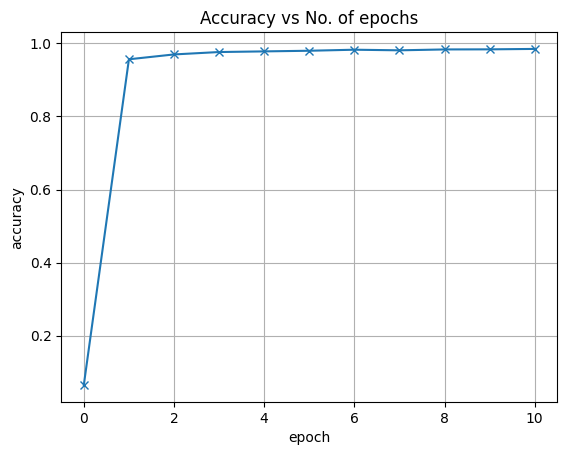

In [156]:
plot_metric([val_acc]+val_metrics)

In [157]:
def plot_losses(train_losses , valid_losses):
  plt.plot(train_losses,'-x')
  plt.plot(valid_losses,'-o')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs No. of epochs')

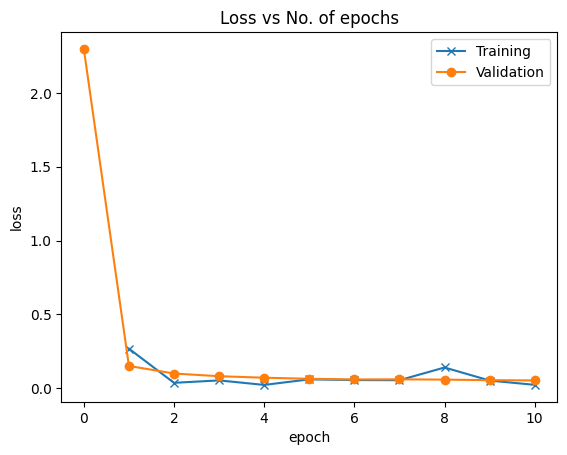

In [162]:
plot_losses([None]+train_losses , [val_loss]+val_losses)